## Centroid Models Assignment

In [18]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

**Take some time to explore the dataframe above.**

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


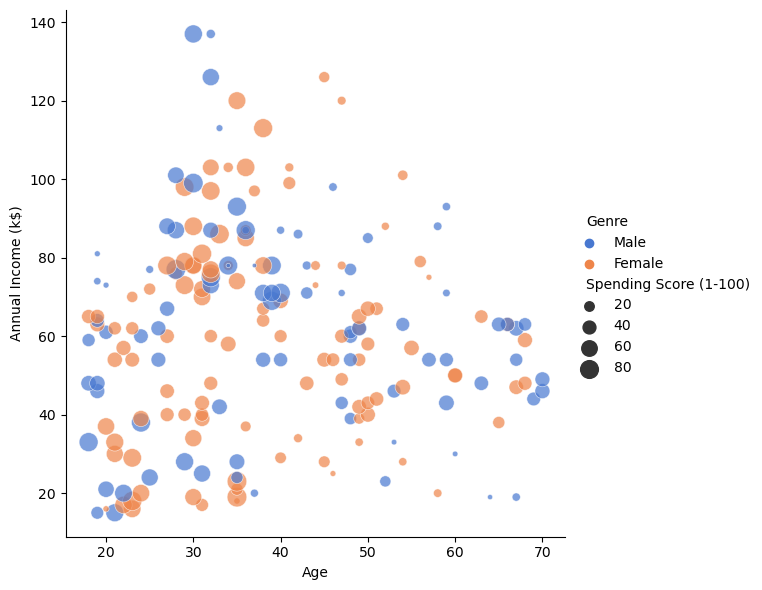

In [5]:
# plot age vs spending
sns.relplot(x='Age', y='Annual Income (k$)', hue='Genre', size='Spending Score (1-100)', sizes=(10, 200), alpha=.7, palette="muted", data=df, height=6)
plt.show()

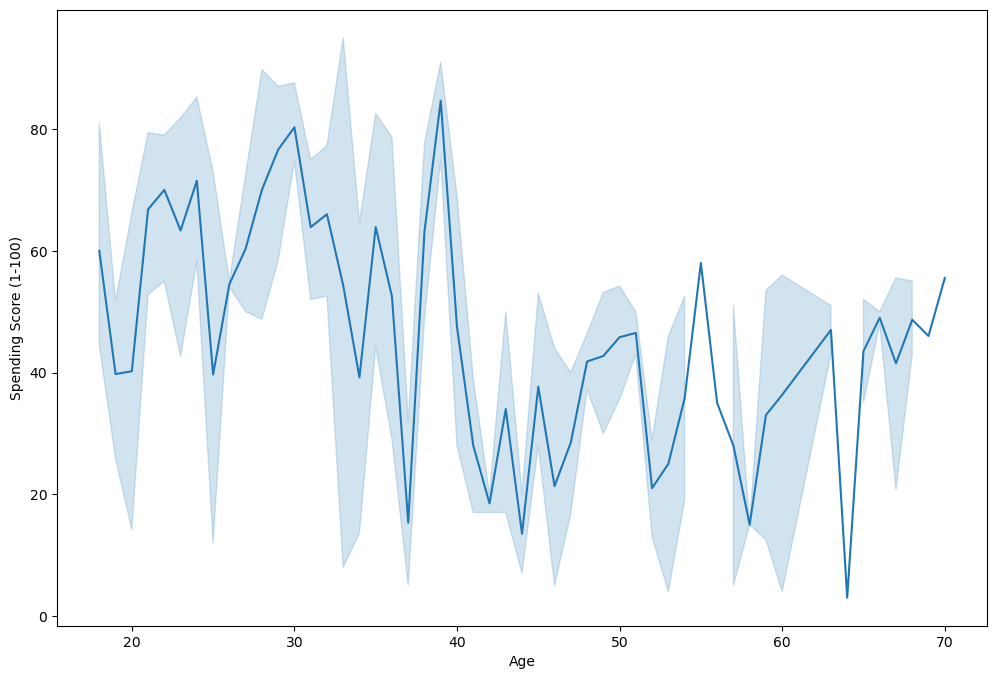

In [6]:
sns.lineplot(x='Age', y='Spending Score (1-100)', data=df)
plt.show()

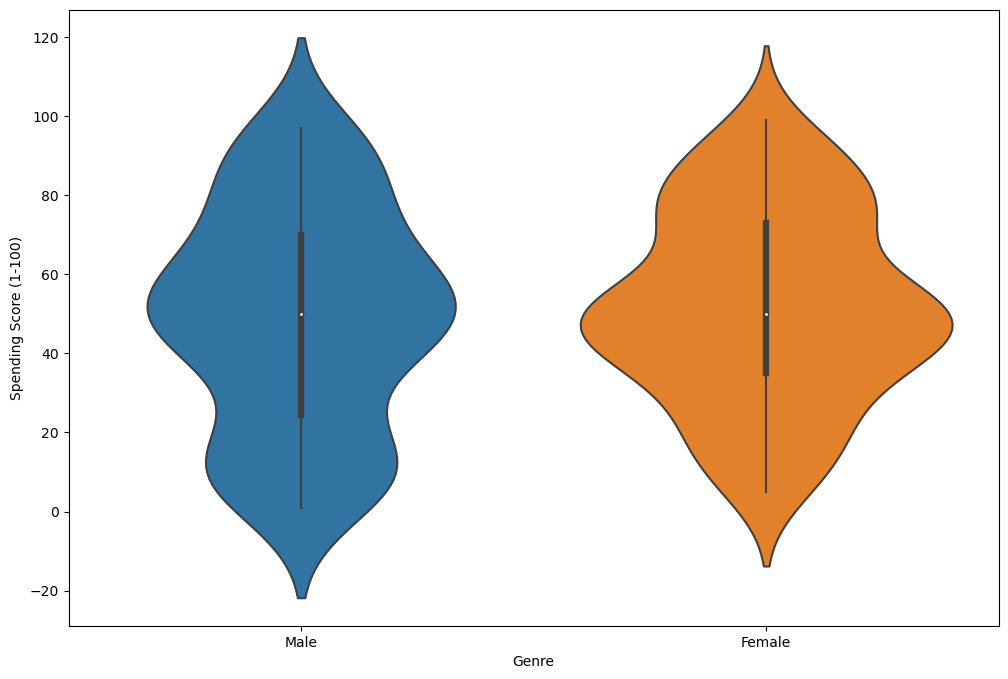

In [7]:
# boxplot genre vs spending
sns.violinplot(x='Genre', y='Spending Score (1-100)', data=df)
plt.show()

----------------------
## Objective: 
#### 1. Fit K-Means, 
#### 2. Find the optimal number of clusters using the elbow rule and plot the clusters.


It may be difficult to visualize clusters on dataframes with many features. To simplify the task, we can plot the clusters in 2-D, by creating a clustering model on the last two columns of the dataset. 

> **Note:** There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though it's **not a must** in the case because we take only the last two columns, and they have already have similar scale.


- Scaling Data

In [8]:
# sklearn standard scaling
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
# scale annual income and spending score
df_scaled = df.copy()
df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])

In [10]:
X = df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']]
# convert X to numpy array
X = X.to_numpy()

- elbow rule

In [11]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

c:\Users\milan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


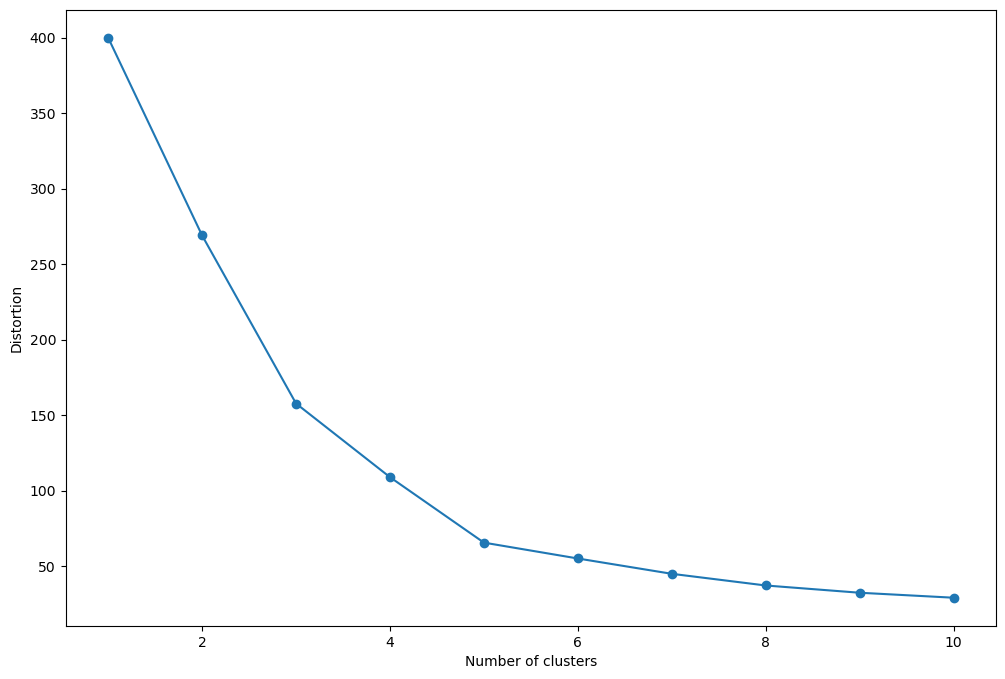

In [12]:
plot_distortion(X)

* fit model with optimal number of clusters

In [29]:
# Fit the model

km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X)

# check silhouette score
silhouette_score(X, y_km)

0.5546571631111091

* define function plot_clusters

In [14]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

* plot clusters

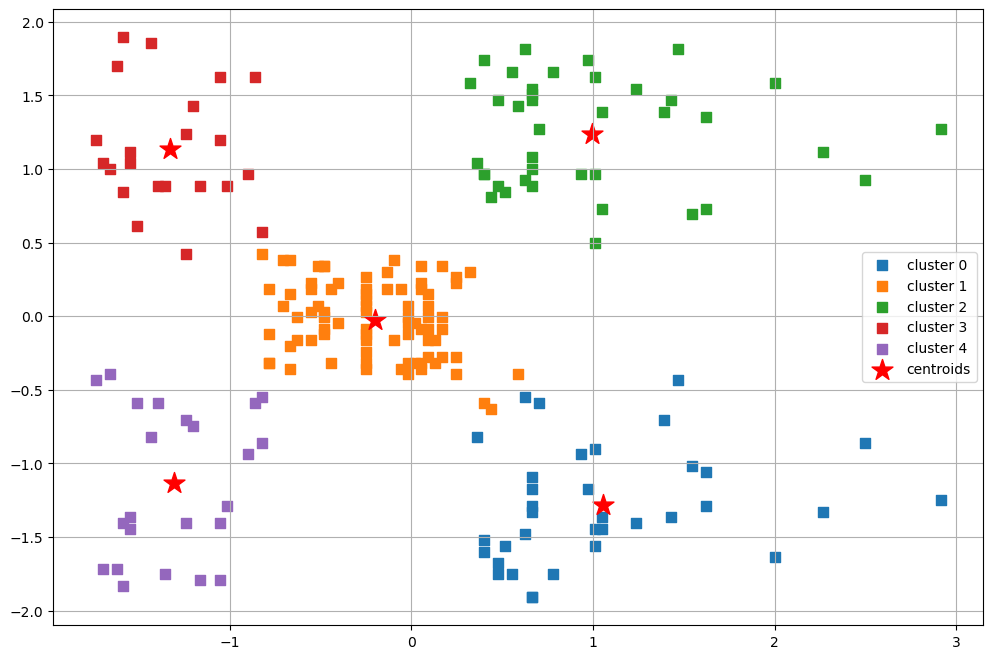

In [30]:
plot_clusters(X,y_km, plt_cluster_centers= True)

In [16]:
# create new feature with grouping
df['IncomeSpending'] = y_km
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),IncomeSpending
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


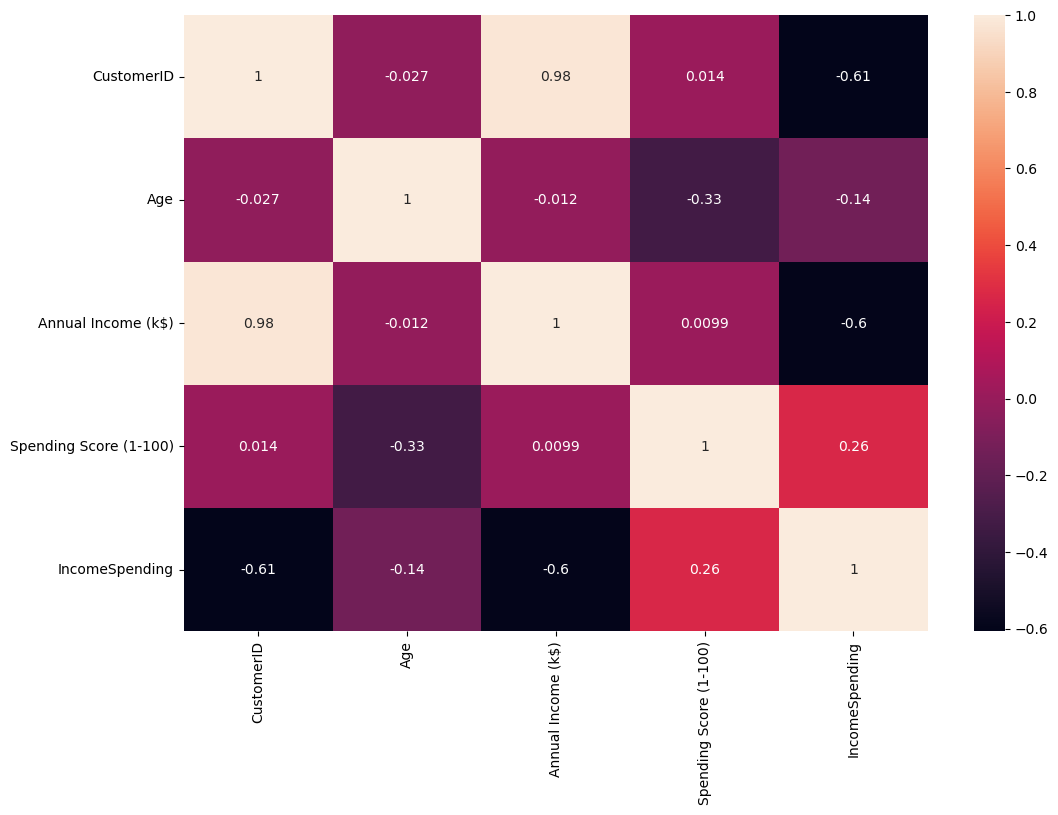

In [17]:
# sns correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.show()